## ```Imports```
---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## ```Misclassification EDA```
---
1. Misclassification eda for insight on similarities and trends in misclassified cases.

In [4]:
df = pd.read_csv('../smaller_data/dt_misclass.csv')
df.drop(columns='Unnamed: 0', inplace=True)

In [5]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,no_of_misclass
0,2019-01-01 17:19:51,3514897282719543,fraud_Cormier LLC,health_fitness,24.75,M,Farmington,NY,14425,42.9580,-77.3083,10717,Cytogeneticist,1952-10-13 00:00:00,42.641638,-76.902462,0,17,1
1,2019-01-01 21:12:01,3585052663373890,fraud_Bahringer Group,health_fitness,106.22,M,West Eaton,NY,13484,42.8546,-75.6605,176,Science writer,1963-12-28 00:00:00,43.331880,-76.482360,0,21,1
2,2019-01-01 21:23:29,180058696935600,fraud_Jerde-Hermann,travel,5.21,M,De Lancey,NY,13752,42.1890,-74.9229,782,Chartered accountant,2000-08-28 00:00:00,43.178184,-75.885184,0,21,1
3,2019-01-06 17:49:40,346208242862904,"fraud_McDermott, Osinski and Morar",home,21.65,F,New York City,NY,10280,40.7105,-74.0163,1577385,"Pharmacist, hospital",1961-05-13 00:00:00,41.314483,-73.757026,0,17,1
4,2019-01-06 23:31:03,5104807169438134,fraud_Hyatt-Blick,travel,5.12,F,Westhampton Beach,NY,11978,40.8295,-72.6473,3255,Financial trader,1978-07-08 00:00:00,41.528181,-73.182200,0,23,1


In [6]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour,no_of_misclass
count,2.670000e+02,267.000000,267.000000,267.000000,267.000000,2.670000e+02,267.000000,267.000000,267.000000,267.000000,267.0
mean,3.009009e+17,67.723333,12689.689139,42.235617,-74.940628,1.711535e+05,42.199818,-74.993255,0.007491,12.116105,1.0
std,1.147918e+18,94.308164,1354.988765,1.206057,1.672541,5.225098e+05,1.322282,1.786892,0.086386,6.854393,0.0
min,5.020128e+11,1.100000,10039.000000,40.672900,-79.189500,6.900000e+01,39.770239,-79.913750,0.000000,0.000000,1.0
25%,1.800287e+14,14.190000,11782.500000,41.059200,-76.019600,1.287500e+03,41.248328,-76.053868,0.000000,6.000000,1.0
50%,3.514897e+15,45.980000,12575.000000,42.228100,-74.165900,4.015000e+03,42.099124,-74.581130,0.000000,13.000000,1.0
75%,3.598215e+15,79.005000,13647.000000,42.958000,-73.755200,1.048650e+04,43.088519,-73.664896,0.000000,18.000000,1.0
max,4.736845e+18,799.670000,14816.000000,44.881600,-72.336600,2.504700e+06,45.813609,-71.680389,1.000000,23.000000,1.0


In [8]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'merch_lat', 'merch_long', 'is_fraud', 'hour', 'no_of_misclass'],
      dtype='object')

In [16]:
df[(df['is_fraud']==0) & (df['no_of_misclass']==1)].head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,no_of_misclass
0,2019-01-01 17:19:51,3514897282719543,fraud_Cormier LLC,health_fitness,24.75,M,Farmington,NY,14425,42.9580,-77.3083,10717,Cytogeneticist,1952-10-13 00:00:00,42.641638,-76.902462,0,17,1
1,2019-01-01 21:12:01,3585052663373890,fraud_Bahringer Group,health_fitness,106.22,M,West Eaton,NY,13484,42.8546,-75.6605,176,Science writer,1963-12-28 00:00:00,43.331880,-76.482360,0,21,1
2,2019-01-01 21:23:29,180058696935600,fraud_Jerde-Hermann,travel,5.21,M,De Lancey,NY,13752,42.1890,-74.9229,782,Chartered accountant,2000-08-28 00:00:00,43.178184,-75.885184,0,21,1
3,2019-01-06 17:49:40,346208242862904,"fraud_McDermott, Osinski and Morar",home,21.65,F,New York City,NY,10280,40.7105,-74.0163,1577385,"Pharmacist, hospital",1961-05-13 00:00:00,41.314483,-73.757026,0,17,1
4,2019-01-06 23:31:03,5104807169438134,fraud_Hyatt-Blick,travel,5.12,F,Westhampton Beach,NY,11978,40.8295,-72.6473,3255,Financial trader,1978-07-08 00:00:00,41.528181,-73.182200,0,23,1


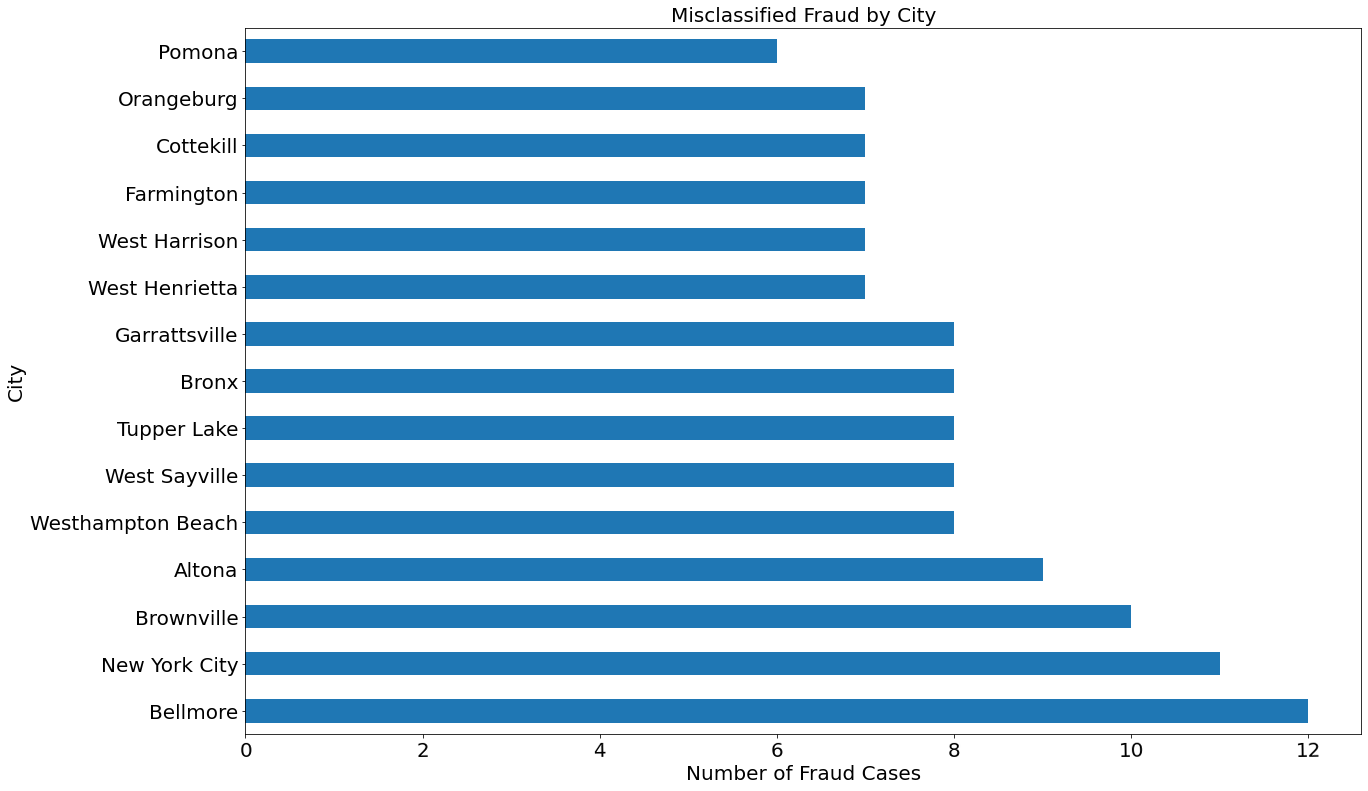

In [61]:
df.groupby('city')['is_fraud'].count().sort_values(ascending=False).head(15).plot(kind='barh', figsize=(20,13))
plt.title('Misclassified Fraud by City', fontsize=20)
plt.xticks(rotation=1, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('City', fontsize=20)
plt.xlabel('Number of Fraud Cases', fontsize=20)
plt.savefig('/Users/crivera/Desktop/capstone-dsir82/Fraud-Project/visuals/misclass by state.png');

In [51]:
df.groupby('city')['city_pop'].unique().sort_values(ascending=False).head(10)

city
Brooklyn               [2504700]
New York City          [1577385]
Bronx                  [1382480]
Albany                  [151022]
South Richmond Hill      [47211]
North Tonawanda          [45100]
Bellmore                 [34496]
Northport                [21902]
Hudson                   [17867]
West Harrison            [11250]
Name: city_pop, dtype: object

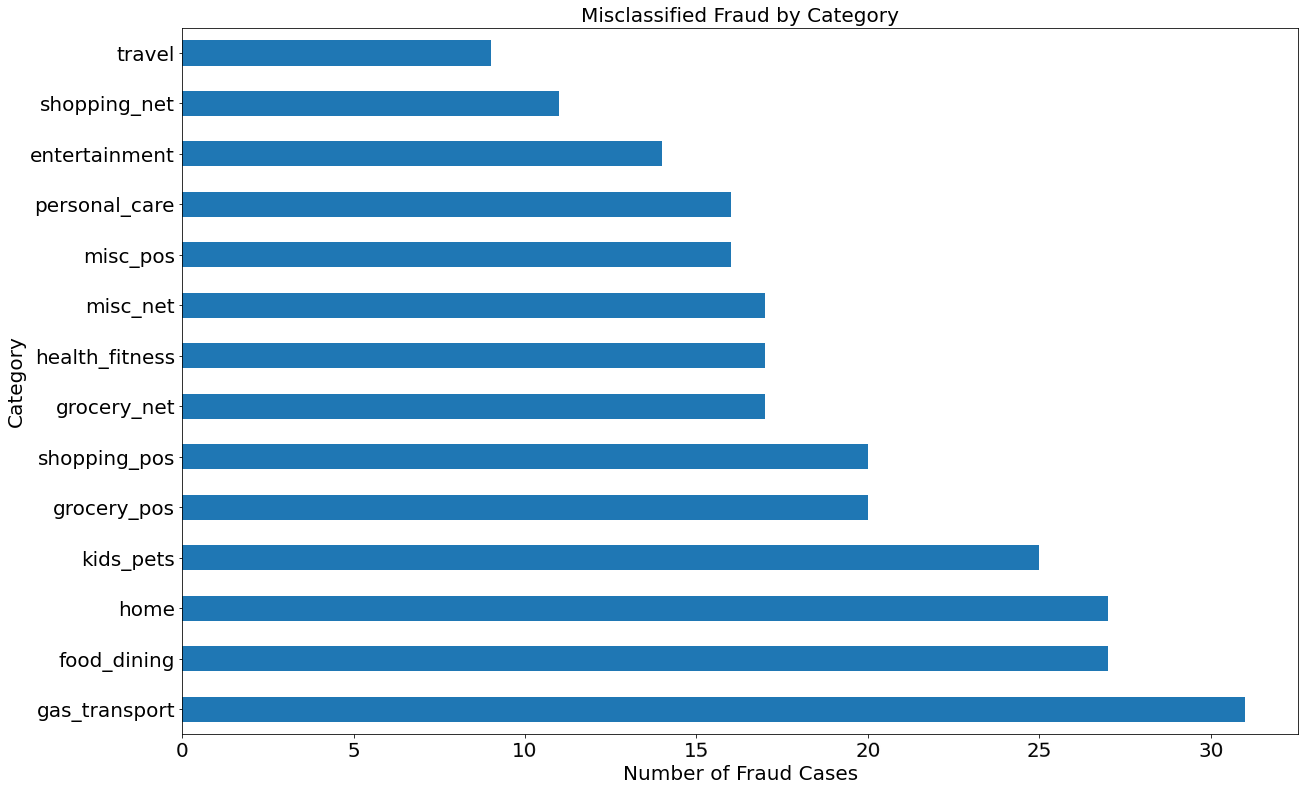

In [64]:
df.groupby('category')['is_fraud'].count().sort_values(ascending=False).plot(kind='barh', figsize=(20,13))
plt.title('Misclassified Fraud by Category', fontsize=20)
plt.xticks(rotation=1, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Category', fontsize=20)
plt.xlabel('Number of Fraud Cases', fontsize=20);

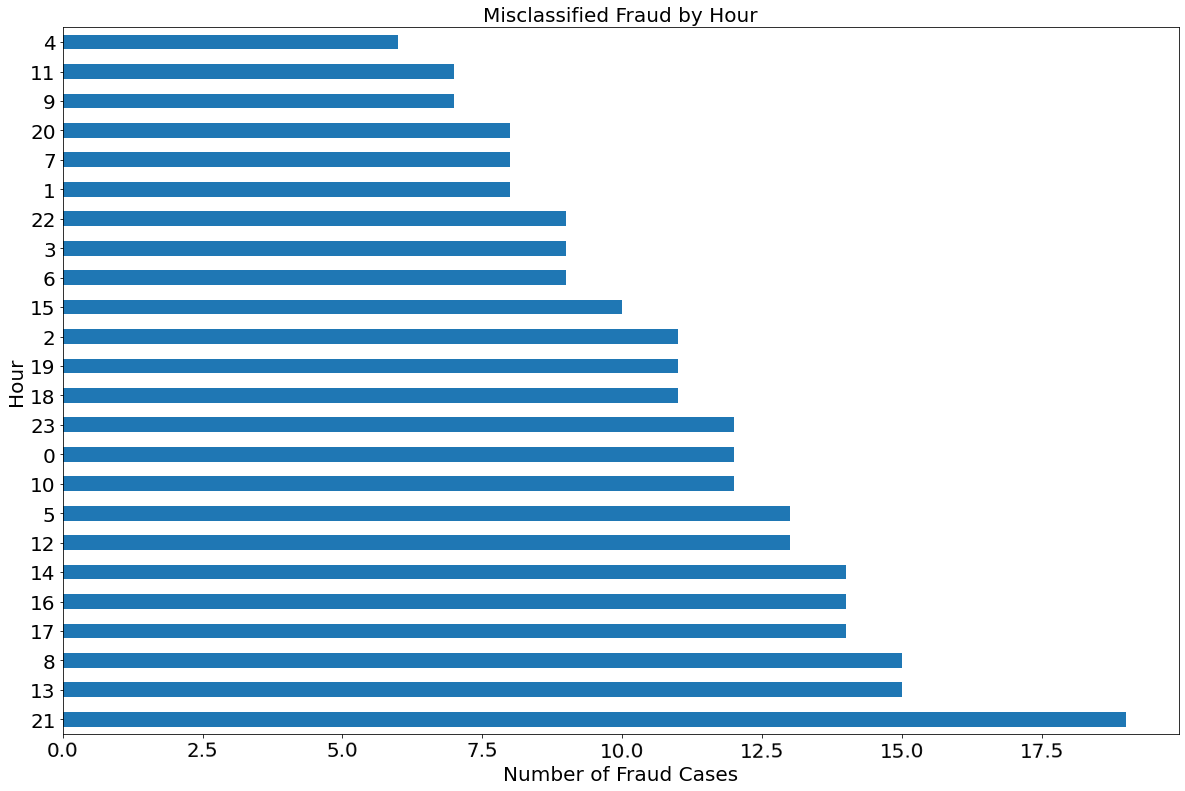

In [65]:
df.groupby('hour')['is_fraud'].count().sort_values(ascending=False).plot(kind='barh', figsize=(20,13))
plt.title('Misclassified Fraud by Hour', fontsize=20)
plt.xticks(rotation=1, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Hour', fontsize=20)
plt.xlabel('Number of Fraud Cases', fontsize=20);

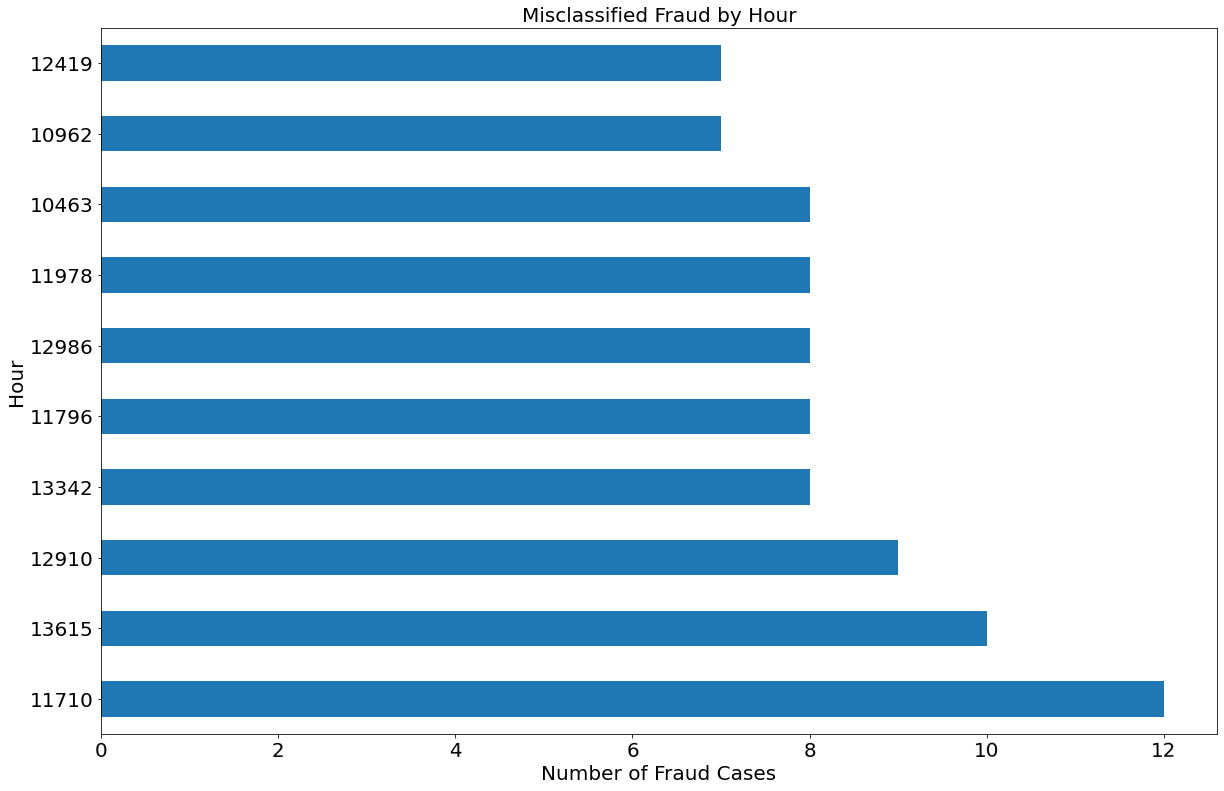

In [82]:
df.groupby('zip')['is_fraud'].count().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(20,13))
plt.title('Misclassified Fraud by Hour', fontsize=20)
plt.xticks(rotation=1, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Hour', fontsize=20)
plt.xlabel('Number of Fraud Cases', fontsize=20);